In [3]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
# actively reload module (during working on analyse_embeddings.py)
import importlib
import matplotlib.image as mpimg
import mat73
font = {'family' : 'Helvetica',
        #'sans-serif': ['Helvetica'],
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

matplotlib.rc('font', **font)
matplotlib.rc('axes.spines',right=False)
matplotlib.rc('axes.spines',top=False)
matplotlib.rc('axes',edgecolor='black')
matplotlib.rc('xtick',color='black',bottom=True)
matplotlib.rc('ytick',color='black',left=True)



### COLOR definitions ###
#colors of undistorted and distorted mesh
color_undist = np.array([0,105,170])/255
color_dist = np.array([200,80,60])/255

# for yaw, pitch and roll
colors_ypr = [ np.array([210,150,0])/255,
               np.array([80,170,200])/255,
               np.array([175,110,150])/255]

# for undistorted, add 1 add 3
colors_add1 =  np.array([50,110,30])/255
colors_add3 =  np.array([200,80,60])/255

colors_add1 = sb.blend_palette(['#214017','#326e1e','#4ad41c'],13)
colors_add3 = sb.blend_palette(['#994738','#ee5c43','#ed8e7d'],13)

color_dynobs = np.array([130,185,160])/255
color_statobs = np.array([215,180,105])/255
 #sb.color_palette("Oranges")



#f6bd60, #139a43, #0eb1d2, #805d93, #c05746


## FoV size of virtual frame
fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree


plotting subj  3
plotting subj  4
plotting subj  5
plotting subj  7
plotting subj  8
plotting subj  9
plotting subj  10
plotting subj  11
plotting subj  12
plotting subj  13
plotting subj  14
plotting subj  15
plotting subj  16


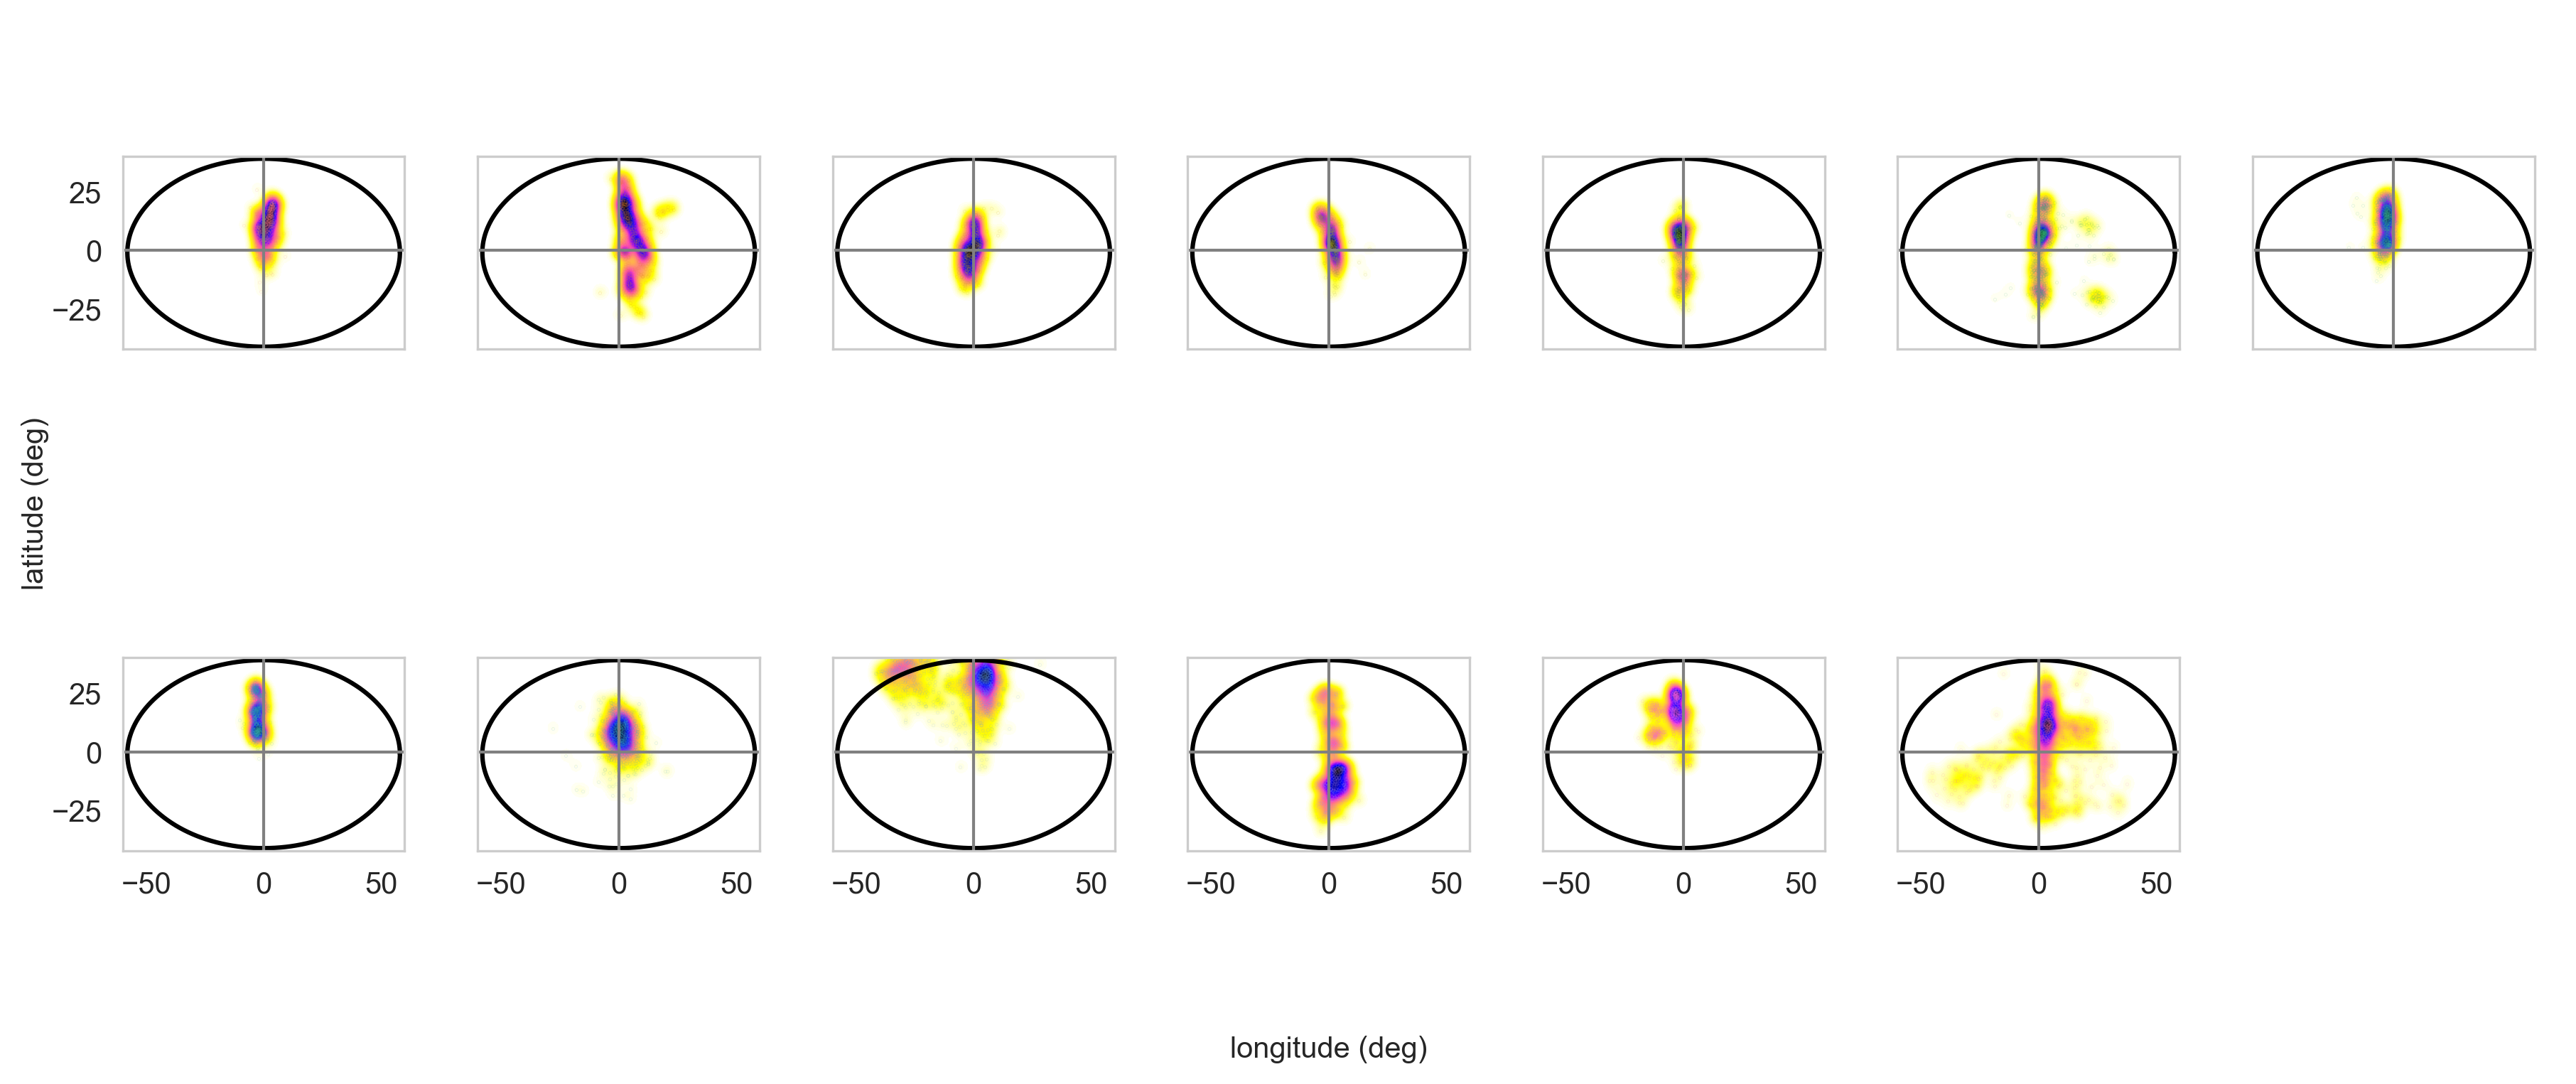

In [3]:
### Gaze distribution
import gaze3d
import importlib
importlib.reload(gaze3d) # in case we do changes to gaze3d
from scipy import stats


## prepare frame ellipse

fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree
fov_imgplane = np.tan(np.radians(fov))
fov_center = np.array([fov_imgplane[1] - fov_imgplane[0] , fov_imgplane[3] - fov_imgplane[2]])/2
fov_axes = np.array([fov_imgplane[0] + fov_imgplane[1] , fov_imgplane[2] + fov_imgplane[3]])/2

theta = np.linspace(0,2*np.pi,2000)
x_ellipse = fov_axes[0] * np.cos(theta) + fov_center[0]
y_ellipse = fov_axes[1] * np.sin(theta) + fov_center[1]
z_ellipse = np.ones(x_ellipse.shape)
r,long_ellipse,lat_ellipse = gaze3d.cart2geographic(x_ellipse,y_ellipse,z_ellipse)

fig, axs = plt.subplots(2,7,sharex=True, sharey=True,figsize=(12, 5), dpi=300)
plt.tight_layout()

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
colors = sb.color_palette("husl", len(subj_list))
counter = 0
for subj in subj_list:
    print('plotting subj ' , str(subj))
    ax = plt.subplot(2,7,1+counter)
    plt.grid(visible=None)

    #tracking_data = pd.read_pickle('../../data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    tracking_trial_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'trial_data.pkl')
    x = np.degrees(tracking_trial_data.mean_c_gaze_long)
    y = np.degrees(tracking_trial_data.mean_c_gaze_lat)
    ind = ~np.isnan(x)
    x = x[ind]
    y = y[ind]
    ind = ~np.isnan(y)
    x = x[ind]
    y = y[ind]
    subj_color = colors[counter] + (0.5,) # add 0.5 transparency
    ax.scatter(x, y,color = subj_color,s= 0.01,marker='.',alpha = 0.5)
    X, Y = np.mgrid[slice(-60,60,0.5),slice(-42,40,0.5)]
    #img_kde = gaze3d.kde_long_lat(x,y,1,X,Y)
    ######
    from sklearn.neighbors import KernelDensity
    kde = KernelDensity(metric='haversine', bandwidth=np.radians(2))
    xtrain = np.vstack([np.radians(x),np.radians(y)]).T
    kde.fit(xtrain)
    xsampl = np.radians(np.vstack([X.ravel(),Y.ravel()]).T)
    img_kde = np.exp(kde.score_samples(xsampl))
    img_kde = img_kde.reshape(X.shape)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#00000000",subj_color,subj_color])
    cmap = matplotlib.colors.ListedColormap(['#00000000', subj_color])
    plt.imshow(-np.rot90(img_kde),cmap = 'gnuplot2',extent=[-60,60,-42,40])
    #ax.plot(x.mean(),y.mean(),'+',color = subj_color)
    plt.plot(np.degrees(long_ellipse),np.degrees(lat_ellipse),'k')
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    #confidence_ellipse(x, y, ax,edgecolor=subj_color)
    counter += 1
    plt.xlim([-60,60])
    plt.ylim([-42,40])

#ax = plt.subplot(2,7,1)
#plt.xlim([-60,60])
#plt.ylim([-42,40])
#plt.axis('off')

ax = plt.subplot(2,7,14)
plt.xlim([-60,60])
plt.ylim([-42,40])
plt.axis('off')


#plt.scatter(x=np.degrees(gaze_df.long),y=np.degrees(gaze_df.lat),c=gaze_df.subj)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")

#

plt.savefig('gaze_kde_trial.svg', bbox_inches='tight', pad_inches = 0)

plotting subj  3


KeyboardInterrupt: 

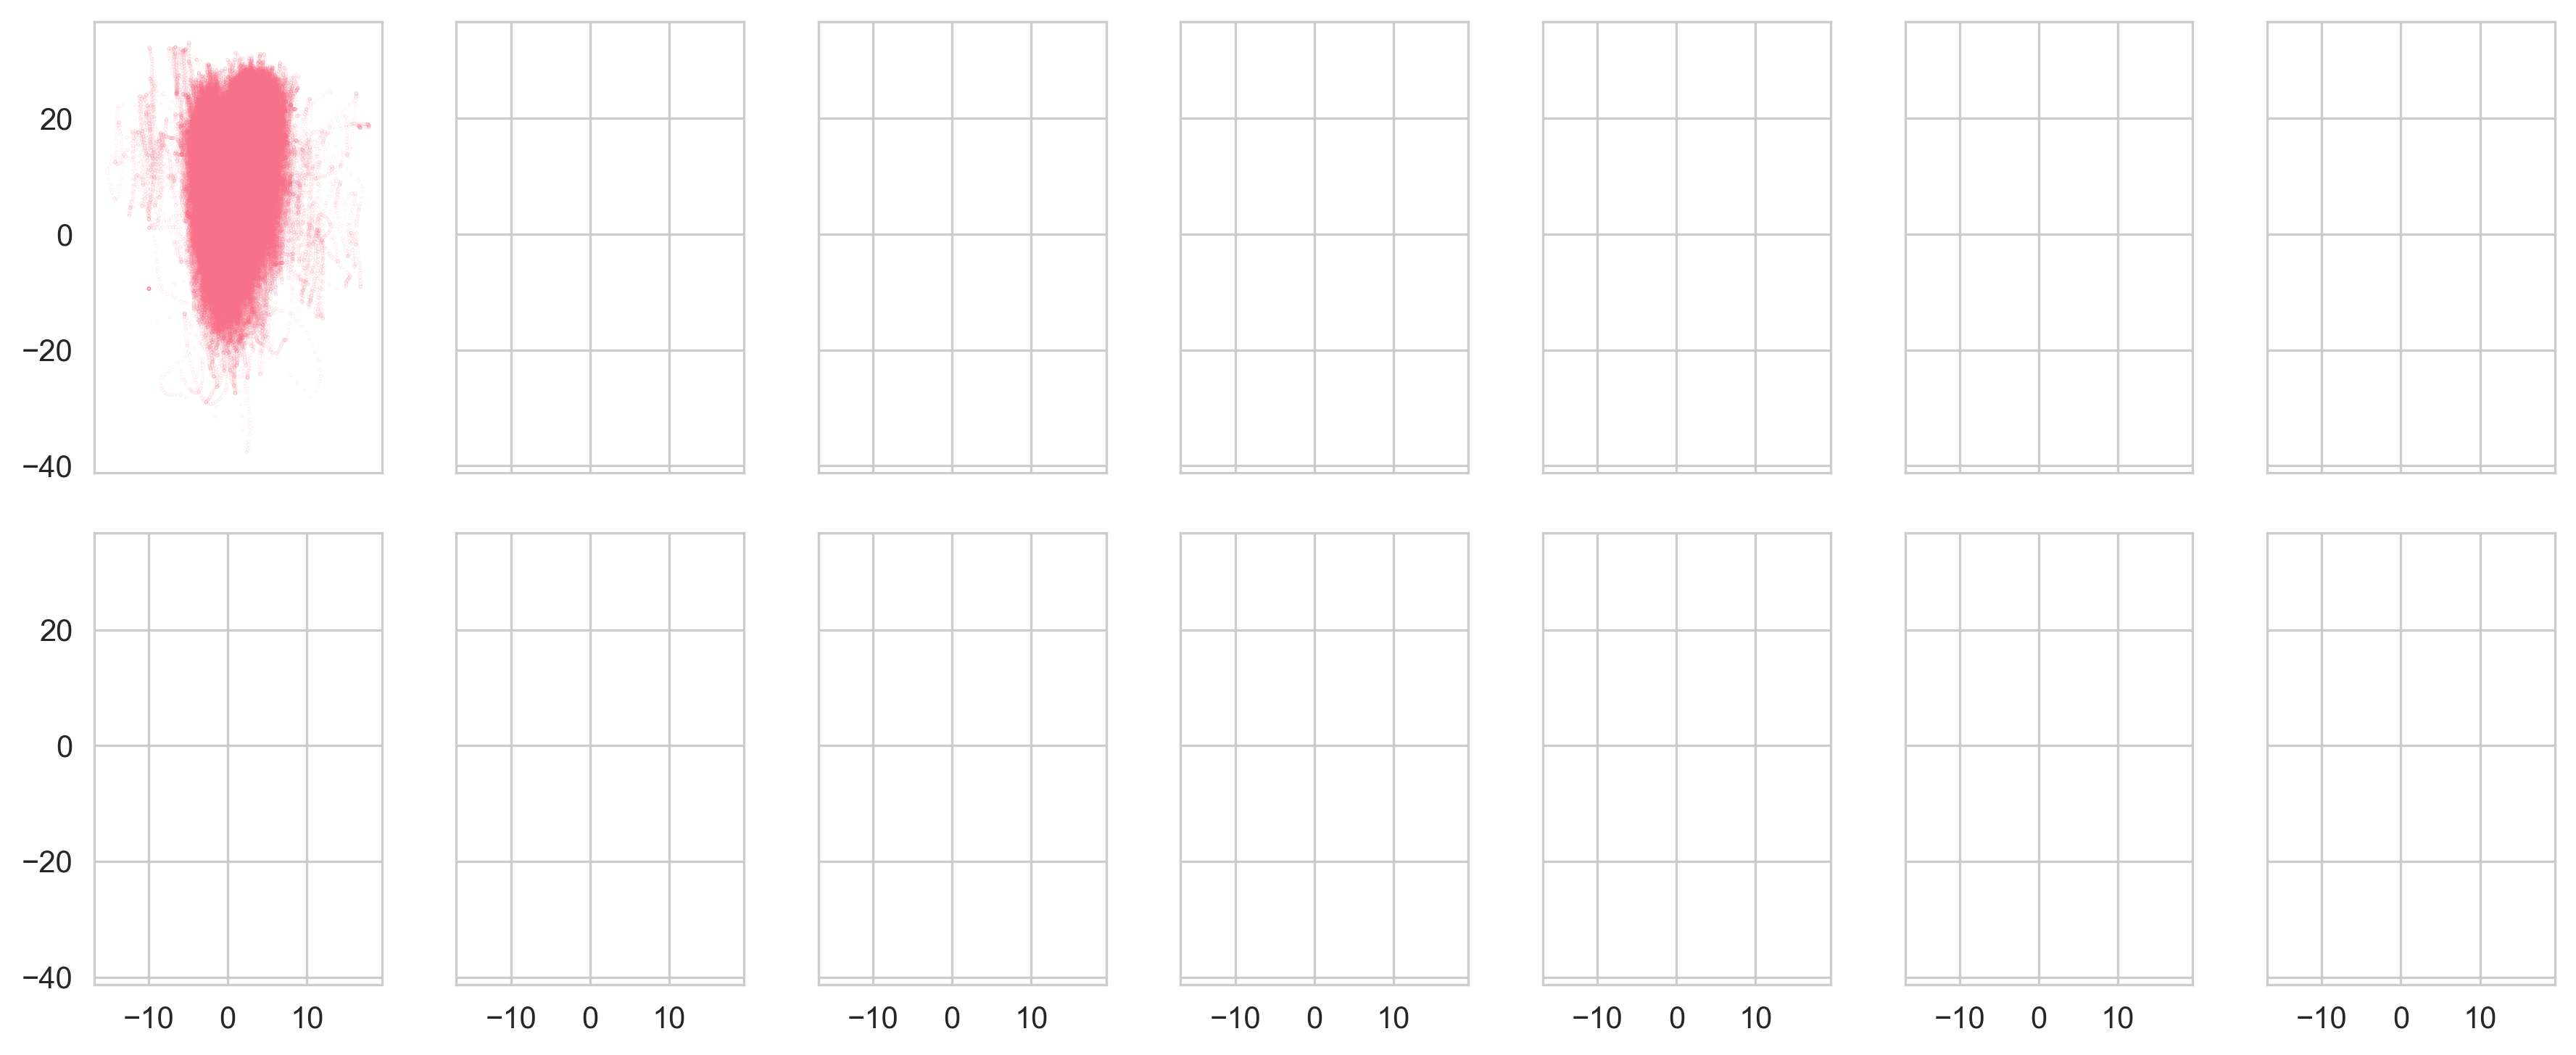

In [3]:
### Gaze distribution
import gaze3d
import importlib
importlib.reload(gaze3d) # in case we do changes to gaze3d
from scipy import stats


## prepare frame ellipse

fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree
fov_imgplane = np.tan(np.radians(fov))
fov_center = np.array([fov_imgplane[1] - fov_imgplane[0] , fov_imgplane[3] - fov_imgplane[2]])/2
fov_axes = np.array([fov_imgplane[0] + fov_imgplane[1] , fov_imgplane[2] + fov_imgplane[3]])/2

theta = np.linspace(0,2*np.pi,2000)
x_ellipse = fov_axes[0] * np.cos(theta) + fov_center[0]
y_ellipse = fov_axes[1] * np.sin(theta) + fov_center[1]
z_ellipse = np.ones(x_ellipse.shape)
r,long_ellipse,lat_ellipse = gaze3d.cart2geographic(x_ellipse,y_ellipse,z_ellipse)

fig, axs = plt.subplots(2,7,sharex=True, sharey=True,figsize=(12, 5), dpi=300)
plt.tight_layout()

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
colors = sb.color_palette("husl", len(subj_list))
counter = 0
for subj in subj_list:
    print('plotting subj ' , str(subj))
    ax = plt.subplot(2,7,1+counter)
    plt.grid(visible=None)

    tracking_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    #tracking_trial_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'trial_data.pkl')
    x = np.degrees(tracking_data.long_comb)
    y = np.degrees(tracking_data.lat_comb)
    ind = ~np.isnan(x)
    x = x[ind]
    y = y[ind]
    ind = ~np.isnan(y)
    x = x[ind]
    y = y[ind]
    subj_color = colors[counter] + (0.5,) # add 0.5 transparency
    ax.scatter(x, y,color = subj_color,s= 0.01,marker='.',alpha = 0.5)
    X, Y = np.mgrid[slice(-60,60,0.5),slice(-42,40,0.5)]
    #img_kde = gaze3d.kde_long_lat(x,y,1,X,Y)
    ######
    from sklearn.neighbors import KernelDensity
    kde = KernelDensity(metric='haversine', bandwidth=np.radians(2))
    xtrain = np.vstack([np.radians(x),np.radians(y)]).T
    kde.fit(xtrain)
    xsampl = np.radians(np.vstack([X.ravel(),Y.ravel()]).T)
    img_kde = np.exp(kde.score_samples(xsampl))
    img_kde = img_kde.reshape(X.shape)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#00000000",subj_color,subj_color])
    cmap = matplotlib.colors.ListedColormap(['#00000000', subj_color])
    plt.imshow(-np.rot90(img_kde),cmap = 'gnuplot2',extent=[-60,60,-42,40])
    #ax.plot(x.mean(),y.mean(),'+',color = subj_color)
    plt.plot(np.degrees(long_ellipse),np.degrees(lat_ellipse),'k')
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    #confidence_ellipse(x, y, ax,edgecolor=subj_color)
    counter += 1
    plt.xlim([-60,60])
    plt.ylim([-42,40])

#ax = plt.subplot(2,7,1)
#plt.xlim([-60,60])
#plt.ylim([-42,40])
#plt.axis('off')

ax = plt.subplot(2,7,14)
plt.xlim([-60,60])
plt.ylim([-42,40])
plt.axis('off')


#plt.scatter(x=np.degrees(gaze_df.long),y=np.degrees(gaze_df.lat),c=gaze_df.subj)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")

#

plt.savefig('gaze_kde_samples.svg', bbox_inches='tight', pad_inches = 0)

In [31]:
def _quantile_to_level(data, quantile): # stolen from seaborn
        """Return data levels corresponding to quantile cuts of mass."""
        isoprop = np.asarray(quantile)
        values = np.ravel(data)
        sorted_values = np.sort(values)[::-1]
        normalized_values = np.cumsum(sorted_values) / values.sum()
        idx = np.searchsorted(normalized_values, 1 - isoprop)
        levels = np.take(sorted_values, idx, mode="clip")
        return levels

def get_longlat_kde(long,lat,long_sample,lat_sample,bandwidth = np.radians(2)):
    from sklearn.neighbors import KernelDensity

    # prepare training data by removing NaNs
    ind = ~np.isnan(long)
    x = long[ind]
    y = lat[ind]
    ind = ~np.isnan(y)
    x = x[ind]
    y = y[ind]
    xtrain = np.vstack([x,y]).T

    # train Kernel Density Estimator
    kde = KernelDensity(metric='haversine', bandwidth=bandwidth)
    kde.fit(xtrain)

    # evaluate KDE at sampling points
    xsampl = np.vstack([long_sample.ravel(),lat_sample.ravel()]).T
    img_kde = np.exp(kde.score_samples(xsampl))
    img_kde = img_kde.reshape(long_sample.shape)
    return img_kde

def get_xy_kde(x,y,x_sample,y_sample,bandwidth = 0.03):
    from sklearn.neighbors import KernelDensity

    # prepare training data by removing NaNs
    ind = ~np.isnan(x_img)
    x = x_img[ind]
    y = y_img[ind]
    ind = ~np.isnan(y)
    x = x[ind]
    y = y[ind]
    xtrain = np.vstack([x,y]).T

    # train Kernel Density Estimator
    kde = KernelDensity(metric='euclidean', bandwidth=bandwidth)
    kde.fit(xtrain)

    # evaluate KDE at sampling points
    xsampl = np.vstack([x_sample.ravel(),y_sample.ravel()]).T
    img_kde = np.exp(kde.score_samples(xsampl))
    img_kde = img_kde.reshape(x_sample.shape)
    return img_kde


# calculate the solid angle covered by the gaze heatmap with the specified quantile
# long,lat in radians
def solid_angle_kde(long,lat, # recorded gaze points
                    dlong=np.radians(1),dlat=np.radians(1), # stepsize of sampling points
                    quantile = 0.05): # defines threshold used to calculate "gaze area"

    long_samp,lat_samp  = np.mgrid[slice(-np.radians(60),np.radians(60),dlong),
                                   slice(-np.radians(42),np.radians(40),dlat)]

    kde = get_longlat_kde(long,lat,long_samp,lat_samp)

    #dlong = np.median(np.diff(long, axis = 0))
    #dlat = np.median(np.diff(lat, axis = 1))

    # calculate solid angle element for each "pixel" of the kde
    dOmega = np.cos(lat_samp) * dlong * dlat
    # get treshold level for quantile mass in kde
    threshold = _quantile_to_level(kde, quantile)
    return (dOmega * (kde>=threshold)).sum() , kde # sum all dOmega elements where distribution >= threshold

# calculate the solid angle covered by the gaze heatmap with the specified quantile
# long,lat in radians
def scene_kde(x,y, # recorded gaze points
                    dx=0.02,dy=0.02, # stepsize of sampling points
                    quantile = 0.05): # defines threshold used to calculate "gaze area"

    x_samp,y_samp  = np.mgrid[slice(-2,2,dx),
                              slice(-2,2,dy)]

    kde = get_xy_kde(x,y,x_samp,y_samp)

    # calculate area element for each "pixel" of the kde
    dA = dx * dy
    # get treshold level for quantile mass in kde
    threshold = _quantile_to_level(kde, quantile)
    return (dA * (kde>=threshold)).sum() , kde # sum all dA elements where distribution >= threshold

# Area covered by gaze - Threshold with KDE


Reading data of subj 3
Time for reading file: 5.169641733169556
Evaluating gaze area
Time Omega calculation: 459.8583300113678
Reading data of subj 4
Time for reading file: 5.336124658584595
Evaluating gaze area
Time Omega calculation: 843.4032335281372
Reading data of subj 5
Time for reading file: 4.949833154678345
Evaluating gaze area
Time Omega calculation: 758.9486653804779
Reading data of subj 7
Time for reading file: 3.8751373291015625
Evaluating gaze area
Time Omega calculation: 584.4811704158783
Reading data of subj 8
Time for reading file: 2.6988141536712646
Evaluating gaze area
Time Omega calculation: 246.45631313323975
Reading data of subj 9
Time for reading file: 5.123271703720093
Evaluating gaze area
Time Omega calculation: 809.7662844657898
Reading data of subj 10
Time for reading file: 4.861605405807495
Evaluating gaze area
Time Omega calculation: 722.4260954856873
Reading data of subj 11
Time for reading file: 5.220222473144531
Evaluating gaze area
Time Omega calculatio

<BarContainer object of 13 artists>

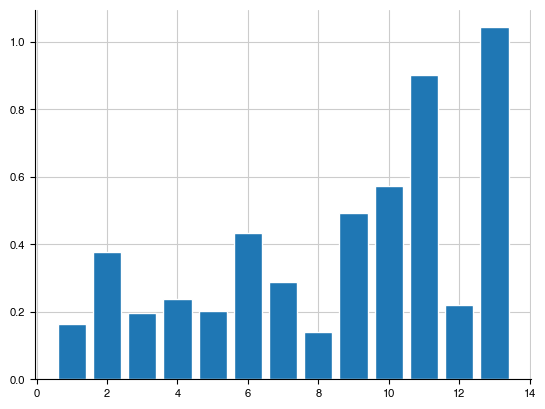

In [10]:
import time
import gaze3d
import pickle
import importlib
importlib.reload(gaze3d) # in case we do changes to gaze3d
from scipy import stats

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
omega = [] # list for output of calculated gaze area
kde = []
for subj in subj_list:
    print('Reading data of subj ' + str(subj))
    start = time.time()
    tracking_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    print('Time for reading file: ' + str(time.time() - start))

    long = tracking_data.long_comb
    lat = tracking_data.lat_comb

    print('Evaluating gaze area')
    start = time.time()

    omega_tmp , kde_tmp = solid_angle_kde(long,lat,dlong = np.radians(0.5),dlat = np.radians(0.5))

    omega.append(omega_tmp)
    kde.append(kde_tmp)
    print('Time Omega calculation: ' + str(time.time() - start))
    #plt.imshow(-np.rot90(img_kde),cmap = 'gnuplot2',extent=[-60,60,-42,40])
    with open('kde.pkl', 'wb') as f: # overwrite existing file
        # dump kde and omega data into file
        pickle.dump(kde, f)
        pickle.dump(omega, f)

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13],omega)

# Gaze in scene

Reading data of subj 3
Time for reading file: 6.068952798843384
Evaluating gaze area
Time KDE calculation: 872.0397408008575
Reading data of subj 4
Time for reading file: 4.860103130340576
Evaluating gaze area
Time KDE calculation: 635.1791410446167
Reading data of subj 5
Time for reading file: 3.816868543624878
Evaluating gaze area
Time KDE calculation: 796.8767199516296
Reading data of subj 7
Time for reading file: 3.6367862224578857
Evaluating gaze area
Time KDE calculation: 695.3748960494995
Reading data of subj 8
Time for reading file: 2.3299691677093506
Evaluating gaze area
Time KDE calculation: 396.75631165504456
Reading data of subj 9
Time for reading file: 4.996935844421387
Evaluating gaze area
Time KDE calculation: 1153.6455564498901
Reading data of subj 10
Time for reading file: 5.199986219406128
Evaluating gaze area
Time KDE calculation: 1095.093675851822
Reading data of subj 11
Time for reading file: 5.279920816421509
Evaluating gaze area
Time KDE calculation: 898.28071689

<BarContainer object of 13 artists>

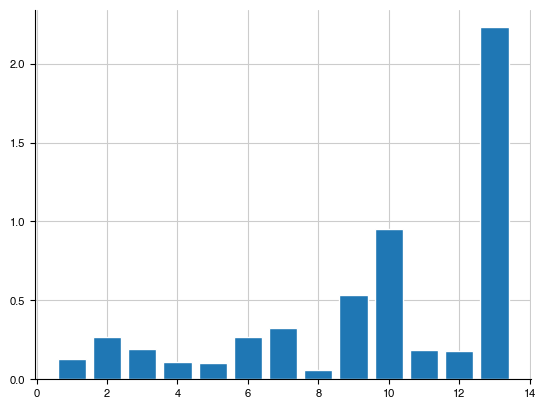

In [4]:
import time
import gaze3d
import pickle
import importlib
importlib.reload(gaze3d) # in case we do changes to gaze3d
from scipy import stats

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
scene_area = [] # list for output of calculated gaze area
image_kde = []
for subj in subj_list:
    print('Reading data of subj ' + str(subj))
    start = time.time()
    tracking_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'filtered_tracking.pkl')
    print('Time for reading file: ' + str(time.time() - start))
    # remove infs from x_img abd y_img
    tracking_data.loc[tracking_data['x_img'] == np.inf,'x_img'] = np.nan
    tracking_data.loc[tracking_data['y_img'] == np.inf,'y_img'] = np.nan

    x_img = tracking_data.x_img
    y_img = tracking_data.y_img

    print('Evaluating gaze area')
    start = time.time()

    area_tmp , kde_tmp = scene_kde(x_img,y_img,dx = 0.01,dy = 0.01)

    scene_area.append(area_tmp)
    image_kde.append(kde_tmp)
    print('Time KDE calculation: ' + str(time.time() - start))
    #plt.imshow(-np.rot90(img_kde),cmap = 'gnuplot2',extent=[-60,60,-42,40])
    with open('kde_scene.pkl', 'wb') as f: # overwrite existing file
        # dump kde and omega data into file
        pickle.dump(image_kde, f)
        pickle.dump(scene_area, f)

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13],scene_area)

In [70]:
tracking_data.loc[tracking_data['x_img'] == np.inf,'x_img'] = np.nan
tracking_data.loc[tracking_data['y_img'] == np.inf,'y_img'] = np.nan
tracking_data[tracking_data['x_img'] == np.inf]['x_img']

Series([], Name: x_img, dtype: float64)

In [2]:
import gaze3d

fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree
fov_imgplane = np.tan(np.radians(fov))
fov_center = np.array([fov_imgplane[1] - fov_imgplane[0] , fov_imgplane[3] - fov_imgplane[2]])/2
fov_axes = np.array([fov_imgplane[0] + fov_imgplane[1] , fov_imgplane[2] + fov_imgplane[3]])/2
theta = np.linspace(0,2*np.pi,2000)

x_ellipse = fov_axes[0] * np.cos(theta) + fov_center[0]
y_ellipse = fov_axes[1] * np.sin(theta) + fov_center[1]
z_ellipse = np.ones(x_ellipse.shape)
r,long_ellipse,lat_ellipse = gaze3d.cart2geographic(x_ellipse,y_ellipse,z_ellipse)

C:\Users\Newton\AppData\Local\Temp\ipykernel_10412\2108975155.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_flat[i].set_yticklabels([f"{tick:.0f}\u00b0" for tick in ax_flat[i].get_yticks()])
C:\Users\Newton\AppData\Local\Temp\ipykernel_10412\2108975155.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_flat[i].set_xticklabels([f"{tick:.0f}\u00b0" for tick in ax_flat[i].get_xticks()])


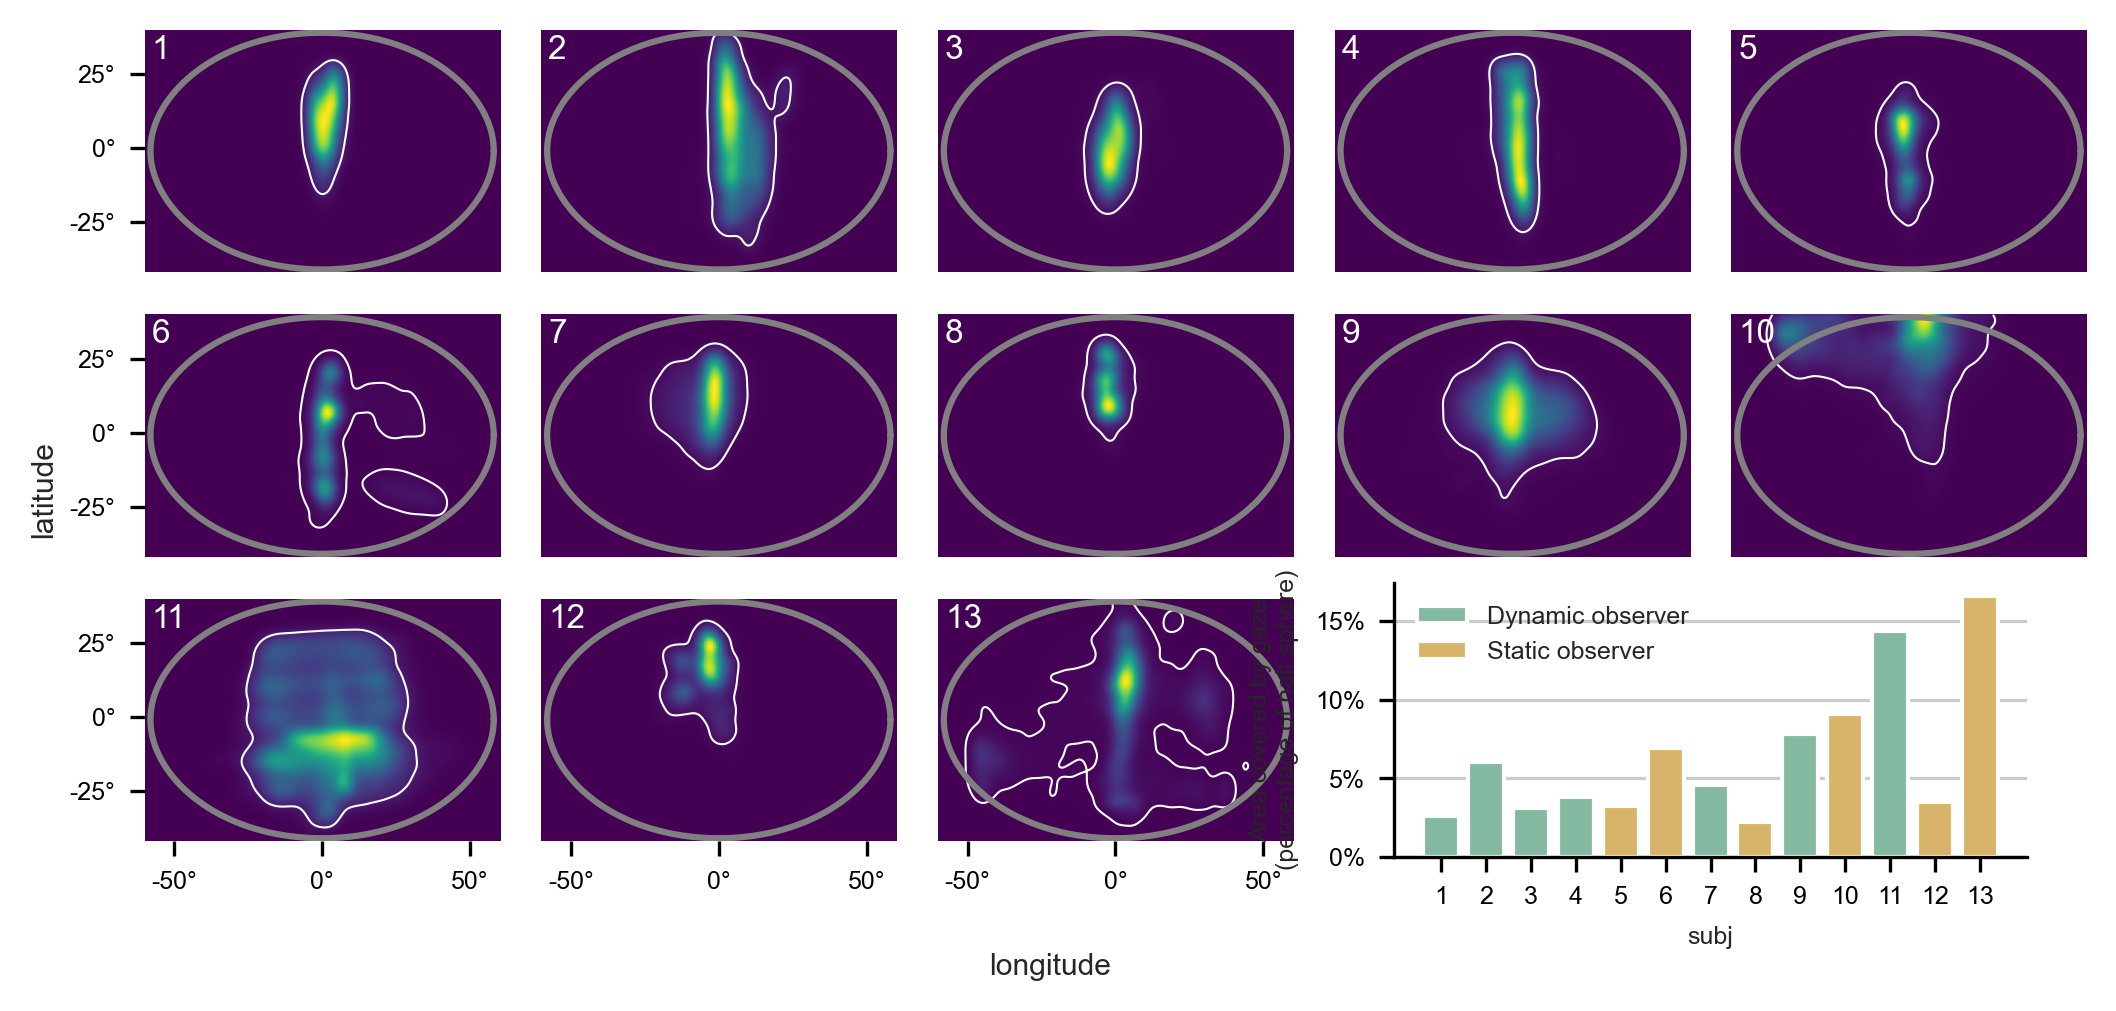

In [29]:
import pickle
subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# set font family, font size, and font weight
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 6
plt.rcParams['font.weight'] = 'normal'

with open('kde.pkl', 'rb') as f:
    # load the first list from the file
    kde = pickle.load(f)
    # load the second list from the file
    omega = pickle.load(f)


cm = 1/2.54
fig,ax = plt.subplots(3,5,figsize=(18.0*cm,8.5*cm),sharex=True, sharey=True,dpi = 300)
ax_flat = ax.flatten()
for i in range(len(kde)):
    threshold = _quantile_to_level(kde[i], 0.05)
    kde_tmp = np.rot90(kde[i])
    #kde_tmp[kde_tmp < threshold] = np.nan
    ax_flat[i].imshow(kde_tmp,extent=(-60,60,-42,40),cmap='viridis')
    ax_flat[i].contour(kde_tmp,origin='upper',extent=(-60,60,-42,40),
                       levels=[threshold], colors='#ffffff', linewidths = 0.5)
    ax_flat[i].plot(np.degrees(long_ellipse),np.degrees(lat_ellipse),'grey')
    #ax_flat[i].set_title(str(i+1), loc='left',fontsize= 6)
    #ax_flat[i].set_title('subj: ' + str(i+1) + ' (' + str(subj_list[i]) + ')')
    ax_flat[i].text(0.02, 0.98, str(i+1), transform=ax_flat[i].transAxes, fontsize=8,color = '#ffffff',
            verticalalignment='top', horizontalalignment='left')
    ax_flat[i].grid(False)
    ax_flat[i].set_frame_on(False)
    ax_flat[i].set_yticklabels([f"{tick:.0f}\u00b0" for tick in ax_flat[i].get_yticks()])
    ax_flat[i].set_xticklabels([f"{tick:.0f}\u00b0" for tick in ax_flat[i].get_xticks()])

    if (i % 5) > 0: # if not one of the leftmost subplots, then remove y ticks
        ax_flat[i].tick_params(
            axis='y',          # changes apply to the x-axis
            left=False)

    if i < 10: # if not one of the lower subplots, then remove x ticks
        ax_flat[i].tick_params(
            axis='x',          # changes apply to the x-axis
            bottom=False)

fig.supxlabel('longitude')
fig.supylabel('latitude')
plt.tight_layout()

gs = ax[2, 3].get_gridspec()
# remove the underlying axes
for a in ax[2, -2:]:
    a.remove()
ax_bar = fig.add_subplot(gs[2, -2:])

head_mover = np.array([1,1,1,1,0,0,1,0,1,0,1,0,0])

# first plot gaze over all samples combined
omega_percentage = np.array(omega)/np.pi/2
#ax_bar = ax[-2:]
ax_bar.bar(range(1,len(omega)+1),omega_percentage*head_mover,align='center',label='Dynamic observer',color=color_dynobs)
ax_bar.bar(range(1,len(omega)+1),omega_percentage*(1-head_mover),align='center',label='Static observer',color=color_statobs)
ax_bar.set_xticks(range(1,len(omega)+1))
ax_bar.xaxis.grid(False)
#ax_bar.set_xticklabels(subj_list)
ax_bar.set_yticks([i * 0.01 for i in range(0,16,5)])
ax_bar.set_yticklabels([f"{i}%" for i in range(0,16,5)])
ax_bar.legend(frameon=False)
ax_bar.set_xlabel('subj')
ax_bar.set_ylabel('Area covered by gaze\n(percentage of half sphere)')
#plt.tight_layout()
ax_bar.set_aspect(35)
#ax_bar.set_title('Area covered by all gaze samples combined')

#ax_flat[-1].axis("off")
#ax_flat[-2].axis("off")

plt.savefig('gaze_kde_total.svg', bbox_inches='tight', pad_inches = 0)

Plot scene KDE

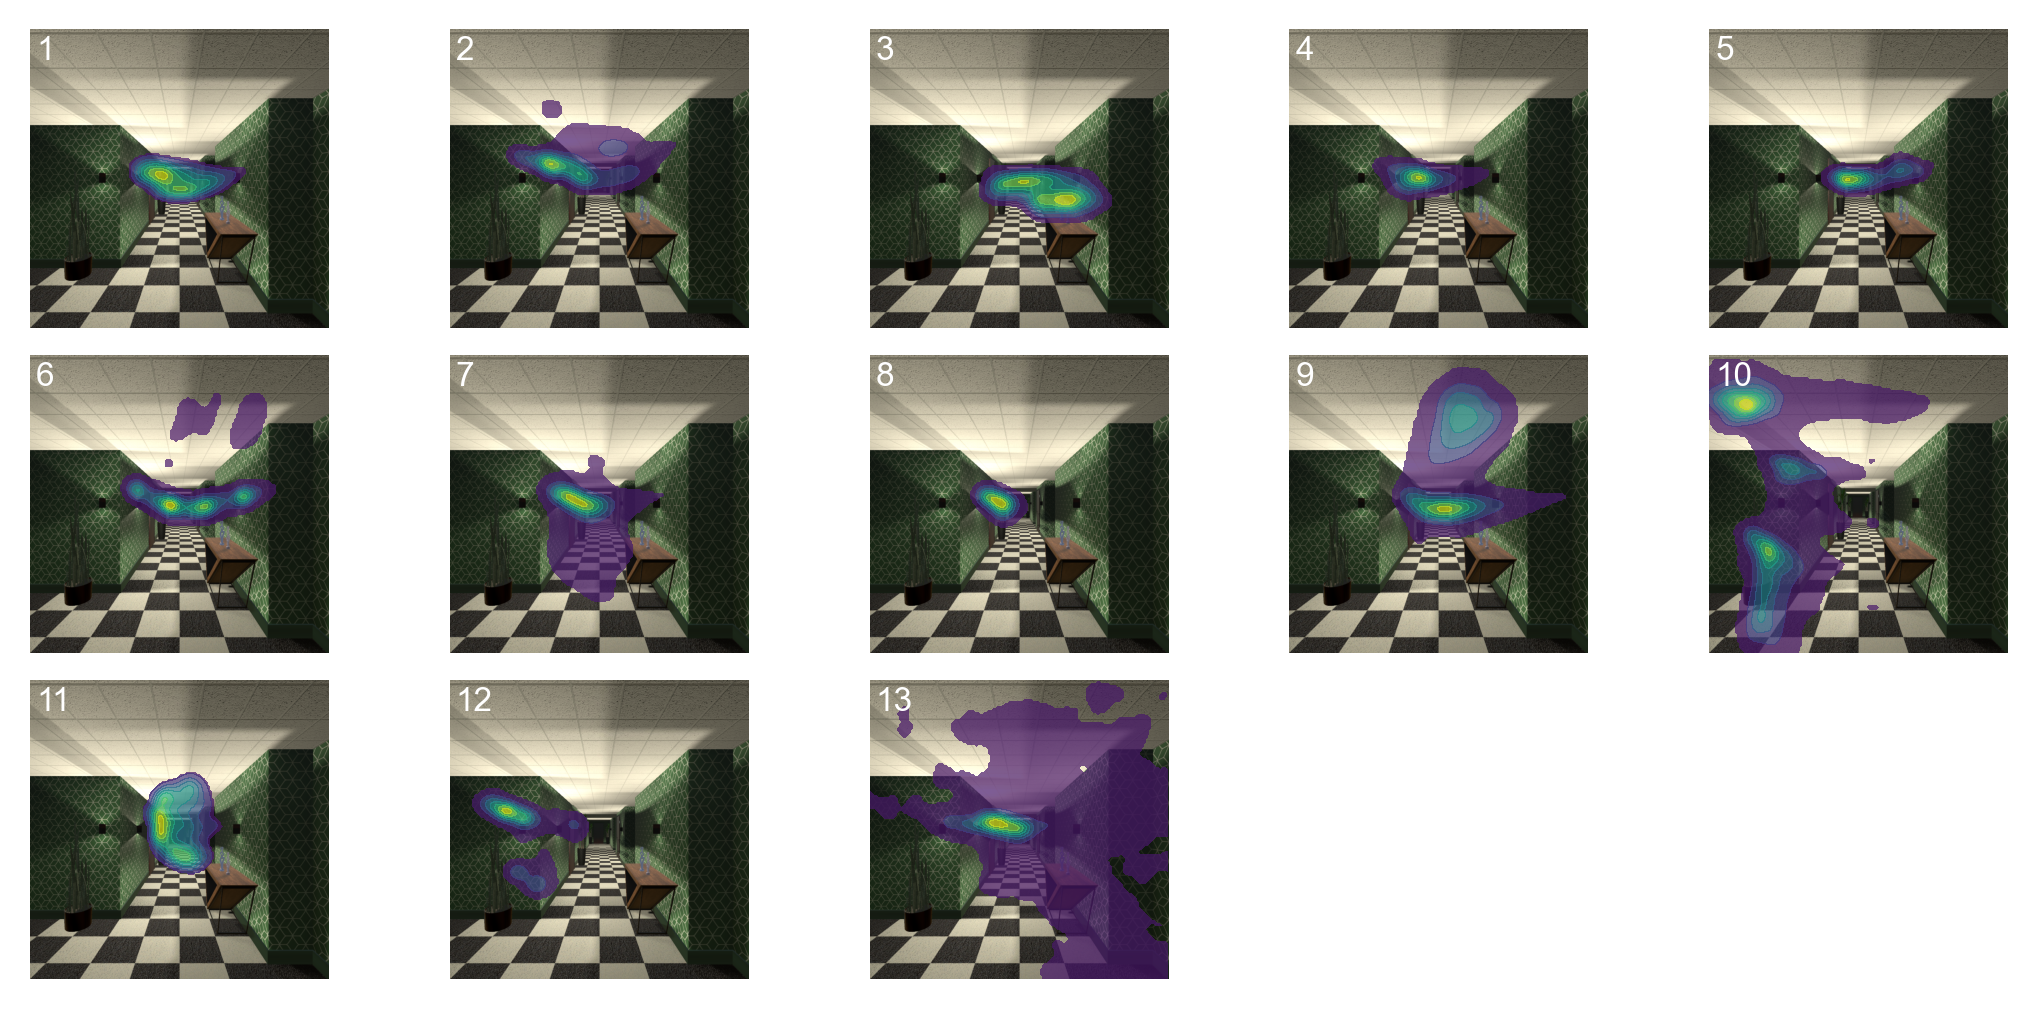

In [42]:
import pickle
# load previously calculated KDE for scene relative coordinates from file
with open('kde_scene.pkl', 'rb') as f:
    kde = pickle.load(f)
    scene_area = pickle.load(f)


# set font family, font size, and font weight
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 6
plt.rcParams['font.weight'] = 'normal'

img = mpimg.imread('./screenshot.png')
fov = 80.0 # horizontal fov of the screenshot
aspect = img.shape[1]/img.shape[0] # vertical to horizontal aspect of the screenshot for FoV calculation
extent = [-np.tan(np.radians(fov/2)) , # left
           np.tan(np.radians(fov/2)) , # right
          -np.tan(np.radians(fov/2)*aspect) , # bottom
           np.tan(np.radians(fov/2)*aspect)   # top
           ]

x_samp,y_samp  = np.mgrid[slice(-2,2,0.01),
                          slice(-2,2,0.01)]

cm = 1/2.54
fig,ax = plt.subplots(3,5,figsize=(18.0*cm,8.5*cm),sharex=True, sharey=True,dpi = 300)
ax_flat = ax.flatten()
for i in range(len(kde)):
    kde_tmp = np.rot90(kde[i])
    threshold = _quantile_to_level(kde[i], 0.05)
    kde_tmp[kde_tmp < threshold] = np.nan

    ax_flat[i].imshow(img, extent = extent)
    ax_flat[i].contourf(x_samp,y_samp,kde_tmp,alpha = 0.7,cmap = 'viridis')
    ax_flat[i].text(0.02, 0.98, str(i+1), transform=ax_flat[i].transAxes, fontsize=8,color = '#ffffff',
            verticalalignment='top', horizontalalignment='left')
    ax_flat[i].grid(False)
    ax_flat[i].set_frame_on(False)
    ax_flat[i].set_xlim(extent[0:2])
    ax_flat[i].set_ylim(extent[2:4])

    ax_flat[i].tick_params(axis='y',left=False,labelleft=False)
    ax_flat[i].tick_params(axis='x',bottom=False,labelbottom=False)

fig.delaxes(ax_flat[-2])
fig.delaxes(ax_flat[-1])

plt.tight_layout()

plt.savefig('gaze_kde_scene.svg', bbox_inches='tight')

In [28]:
kde.img

AttributeError: 'list' object has no attribute 'img'

In [6]:
ax_bar

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

Reading data of subj 3
Time for reading file: 0.006196022033691406
Reading data of subj 4
Time for reading file: 0.008162975311279297
Reading data of subj 5
Time for reading file: 0.0069391727447509766
Reading data of subj 7
Time for reading file: 0.006155729293823242
Reading data of subj 8
Time for reading file: 0.005999326705932617
Reading data of subj 9
Time for reading file: 0.007131814956665039
Reading data of subj 10
Time for reading file: 0.005999088287353516
Reading data of subj 11
Time for reading file: 0.005161285400390625
Reading data of subj 12
Time for reading file: 0.005184650421142578
Reading data of subj 13
Time for reading file: 0.005960226058959961
Reading data of subj 14
Time for reading file: 0.005156993865966797
Reading data of subj 15
Time for reading file: 0.008131742477416992
Reading data of subj 16
Time for reading file: 0.006181001663208008


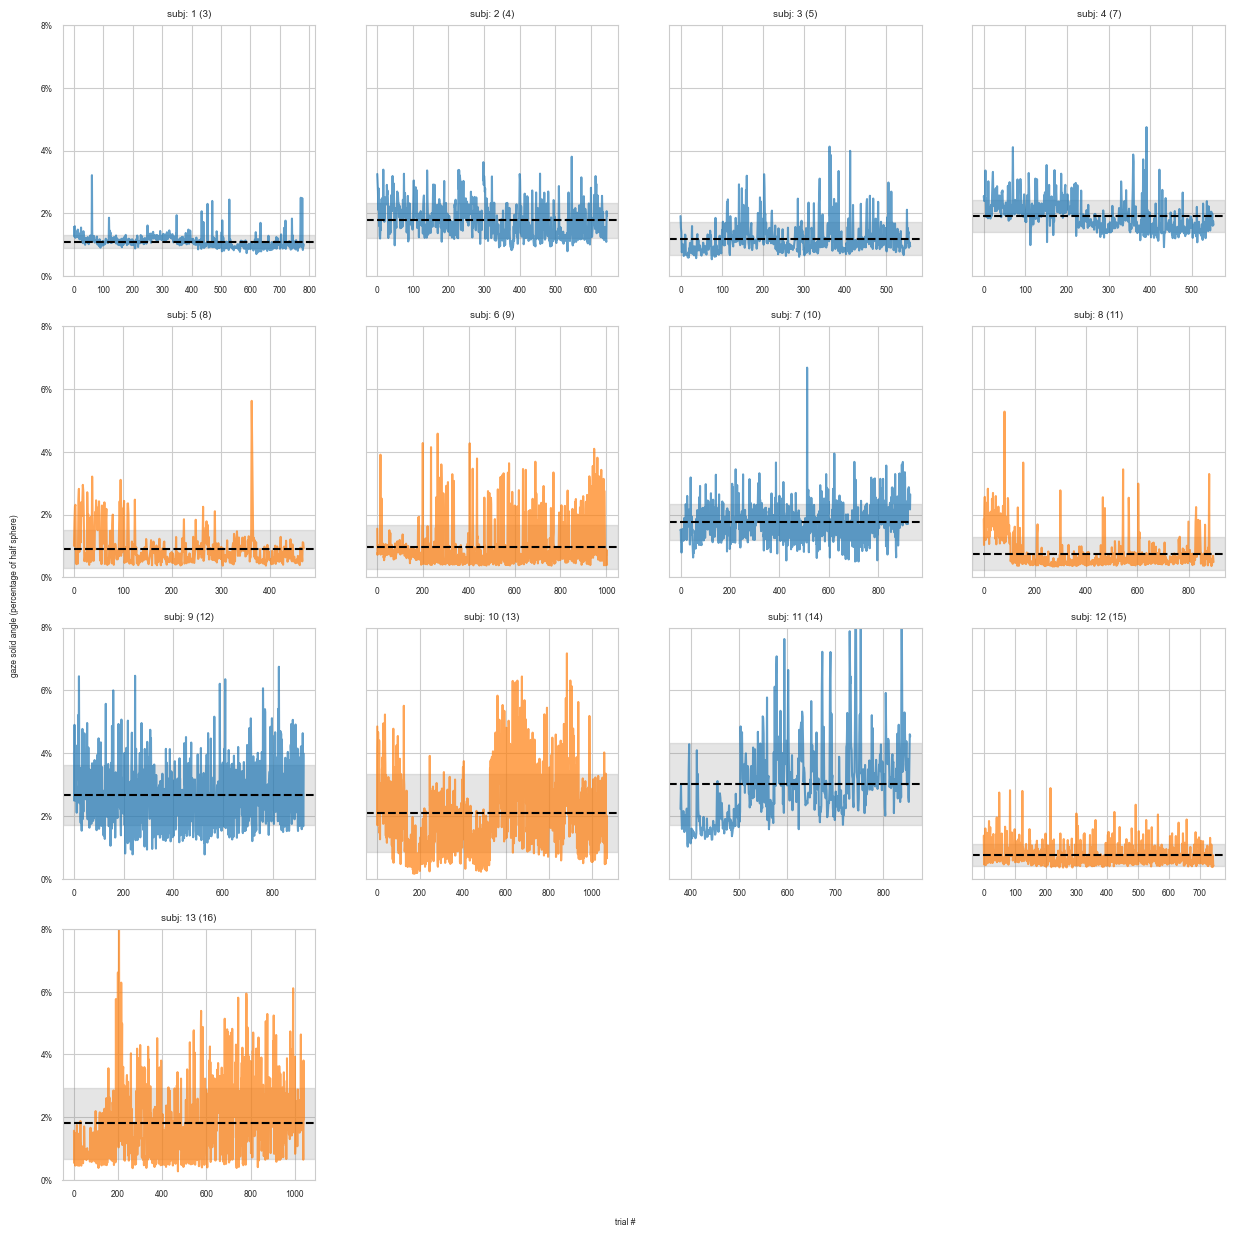

In [10]:

import time

subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
head_mover = np.array([1,1,1,1,0,0,1,0,1,0,1,0,0])

f,ax = plt.subplots(4,4,figsize=(15,15), sharey=True)
ax_flat = ax.flatten()
counter = 0

omega_mean = []
omega_std = []

for subj in subj_list:
    print('Reading data of subj ' + str(subj))
    start = time.time()
    trial_data = pd.read_pickle('./data/' + str(subj).zfill(3) + 'trial_data.pkl')
    print('Time for reading file: ' + str(time.time() - start))
    if head_mover[counter] == 1:
        color = 'tab:blue'
    else:
        color = 'tab:orange'
    ax_flat[counter].plot(trial_data.omega/2/np.pi,color = color,alpha = 0.7)

    # mean and std
    om = np.mean(trial_data.omega/2/np.pi)
    omega_mean.append(om)
    ostd = np.std(trial_data.omega/2/np.pi)
    omega_std.append(ostd)
    ax_flat[counter].axhline(om,color = 'black', linestyle = '--', label='mean')
    ax_flat[counter].axhspan(om - ostd, om + ostd, alpha=0.2, color='gray', label='std')
    plt.xlabel('trial')
    plt.ylabel('Gaze area (% of half-sphere)')
    ax_flat[counter].set_ylim([0, 0.08])
    ax_flat[counter].set_title('subj: ' + str(counter+1) + ' (' + str(subj) + ')')
    ax_flat[counter].set_yticks([i * 0.01 for i in range(0,9,2)])
    ax_flat[counter].set_yticklabels([f"{i}%" for i in range(0,9,2)])
    counter += 1

omega_mean = np.array(omega_mean)
omega_std = np.array(omega_std)

ax_flat[-1].axis("off")
ax_flat[-2].axis("off")
ax_flat[-3].axis("off")

f.text(0.5, 0.08, 'trial #', ha='center')
f.text(0.09, 0.5, 'gaze solid angle (percentage of half sphere)', va='center', rotation='vertical')
plt.savefig('gaze_kde_omega_trial.pdf', bbox_inches='tight', pad_inches = 0)


# Bar plot of gaze area for comparison of subjects

NameError: name 'omega_mean' is not defined

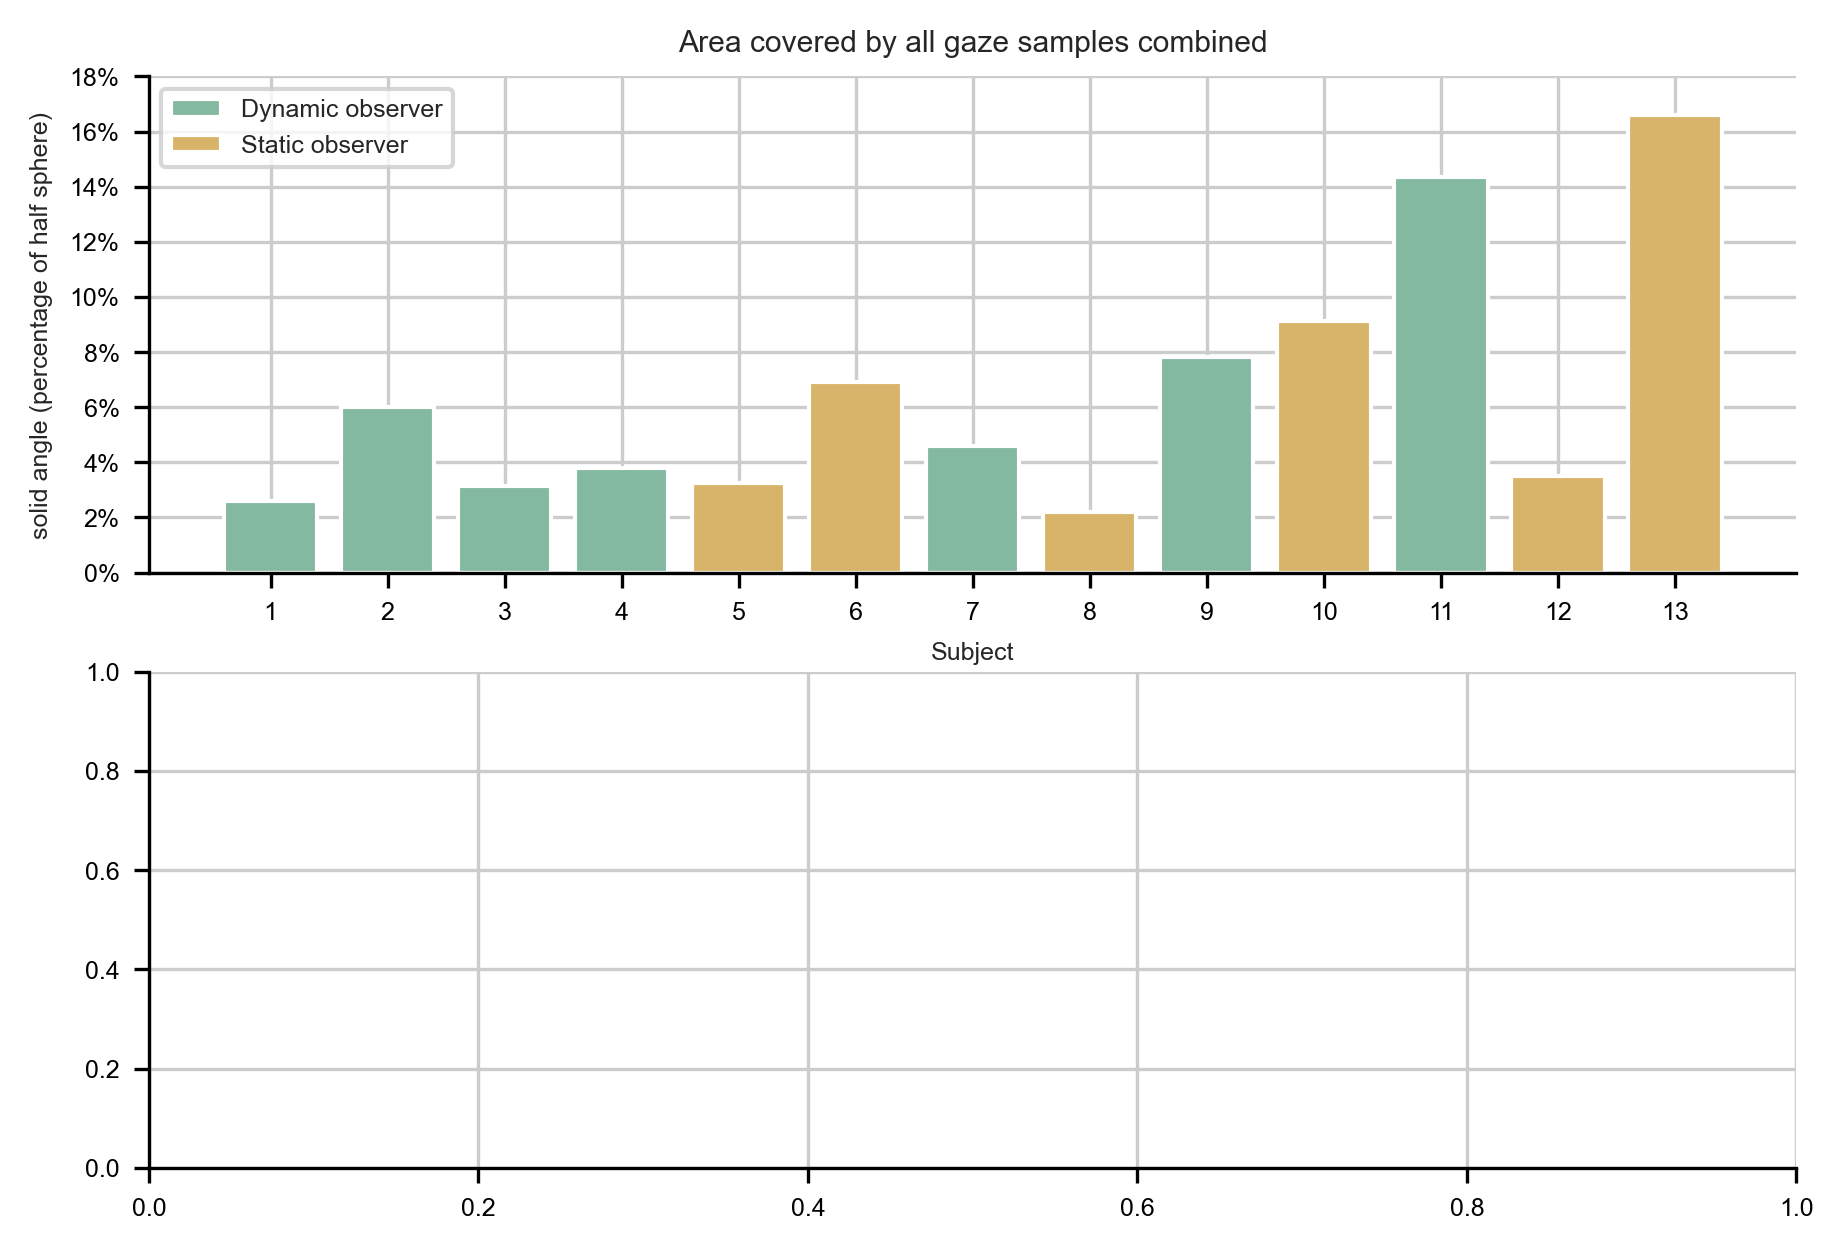

In [30]:
subj_list = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
head_mover = np.array([1,1,1,1,0,0,1,0,1,0,1,0,0])
cm = 1/2.54

f,ax = plt.subplots(2,1,figsize = (18*cm,12*cm),dpi = 300)

# first plot gaze over all samples combined
omega_percentage = np.array(omega)/np.pi/2
ax[0].bar(range(1,len(omega)+1),omega_percentage*head_mover,align='center',label='Dynamic observer',color = color_dynobs)
ax[0].bar(range(1,len(omega)+1),omega_percentage*(1-head_mover),align='center',label='Static observer',color = color_statobs)
ax[0].set_xticks(range(1,len(omega)+1))
#ax[0].set_xticklabels(subj_list)
ax[0].set_yticks([i * 0.01 for i in range(0,19,2)])
ax[0].set_yticklabels([f"{i}%" for i in range(0,19,2)])
ax[0].legend()
ax[0].set_xlabel('Subject')
ax[0].set_ylabel('solid angle (percentage of half sphere)')
ax[0].set_title('Area covered by all gaze samples combined')

#subplot 2

ax[1].bar(range(1,len(omega_mean)+1),omega_mean*head_mover,yerr=omega_std*head_mover, align='center',  ecolor='black', capsize=5,label='Dynamic observer',color = color_dynobs)
ax[1].bar(range(1,len(omega_mean)+1),omega_mean*(1-head_mover),yerr=omega_std*(1-head_mover), align='center', ecolor='black', capsize=5,label='Static observer',color = color_statobs)
ax[1].set_yticks([i * 0.01 for i in range(6)])
ax[1].set_yticklabels([f"{i}%" for i in range(6)])
ax[1].set_xticks(range(1,len(omega_mean)+1))
#ax[1].set_xticklabels(subj_list)
ax[1].legend()

plt.xlabel('Subject')
plt.ylabel('solid angle (percentage of half sphere)')
ax[1].set_title('Mean area (sd) covered per trial')
plt.savefig('gaze_kde_omega_bar.svg', bbox_inches='tight', pad_inches = 0)


In [55]:
import pandas as pd
omega_df = pd.DataFrame({'subj':subj_list,
                         'omega_total':omega_percentage,
                         'omega_mean': omega_mean,
                         'omega_std': omega_std})
omega_df.to_pickle('./data/omega.pkl')

In [61]:
omega_mean = np.array(omega_mean)


In [7]:
omega

[]